In [1]:
market<-read.csv('ads.txt')

In [2]:
market

ID,X,Y
<int>,<dbl>,<dbl>
1,4.2,9.3
2,8.5,18.5
3,9.3,22.8
4,7.5,17.7
5,6.3,14.6
6,12.2,27.9
7,6.5,12.5
8,10.4,25.2
9,5.8,10.8


In [3]:
head(market)

,ID,X,Y
,<int>,<dbl>,<dbl>
1,1,4.2,9.3
2,2,8.5,18.5
3,3,9.3,22.8
4,4,7.5,17.7
5,5,6.3,14.6
6,6,12.2,27.9


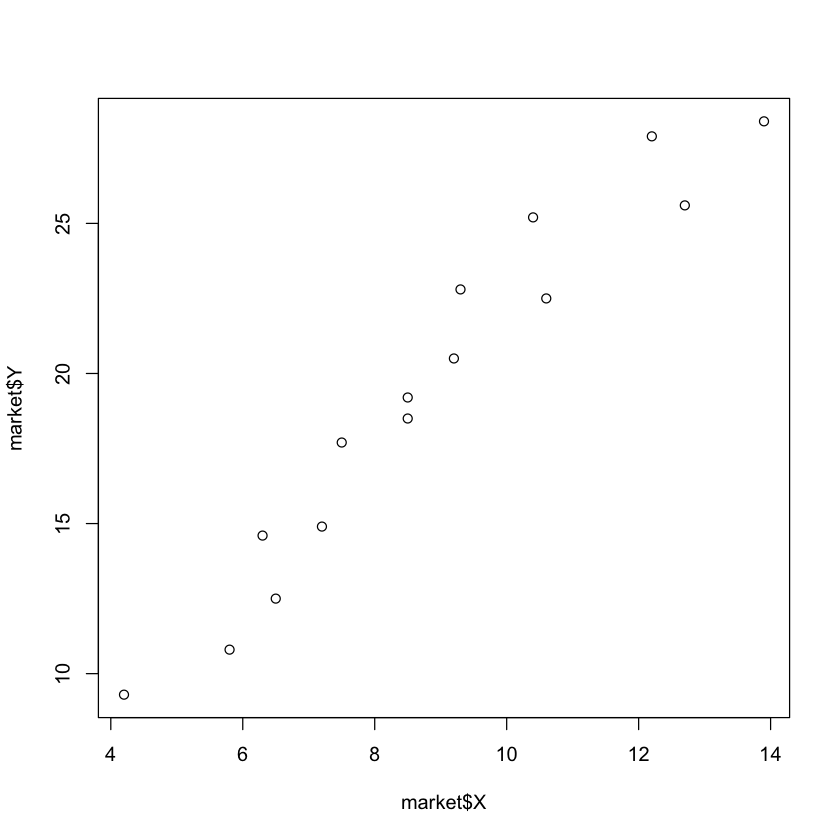

In [4]:
plot(market$X, market$Y)

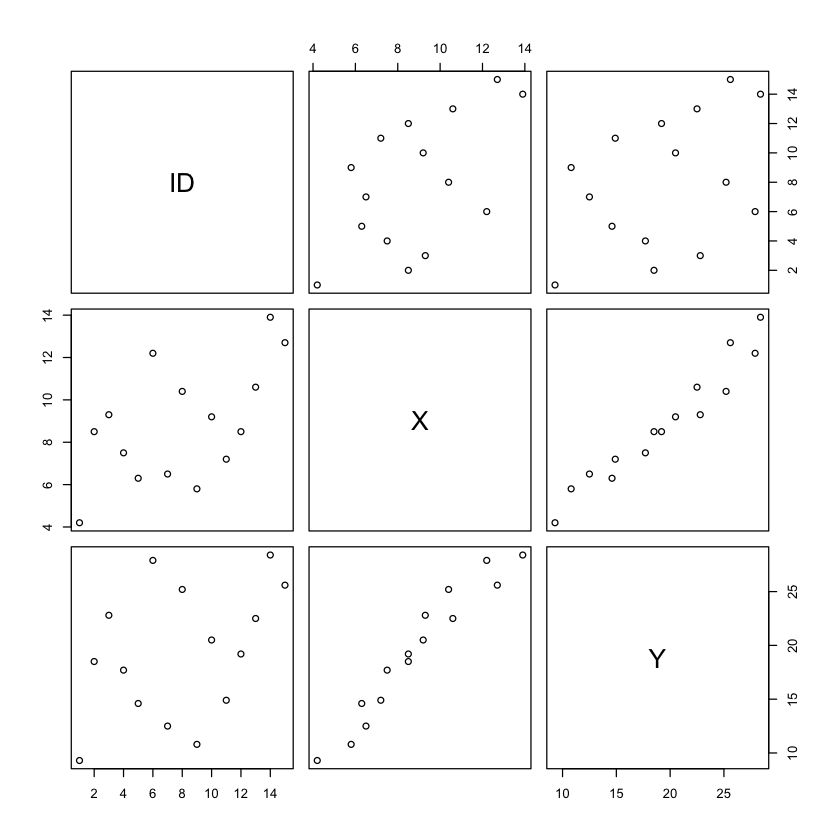

In [5]:
plot(market)

In [6]:
market.lm <- lm(Y~X,data=market)

In [7]:
market.lm


Call:
lm(formula = Y ~ X, data = market)

Coefficients:
(Intercept)            X  
     0.3282       2.1497  


In [8]:
summary(market.lm)


Call:
lm(formula = Y ~ X, data = market)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.02908 -1.35349 -0.05685  0.98903  2.51517 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.3282     1.4302   0.229    0.822    
X             2.1497     0.1548  13.889 3.55e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.587 on 13 degrees of freedom
Multiple R-squared:  0.9369,	Adjusted R-squared:  0.932 
F-statistic: 192.9 on 1 and 13 DF,  p-value: 3.554e-09


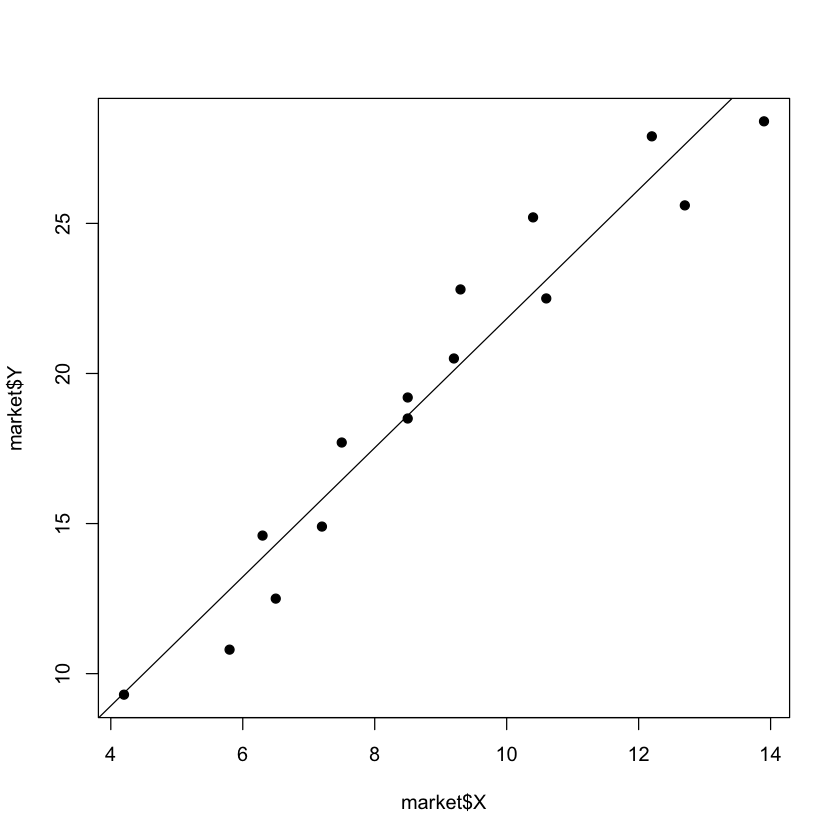

In [9]:
plot(market$X, market$Y, pch=19)
abline(market.lm)

integer(0)

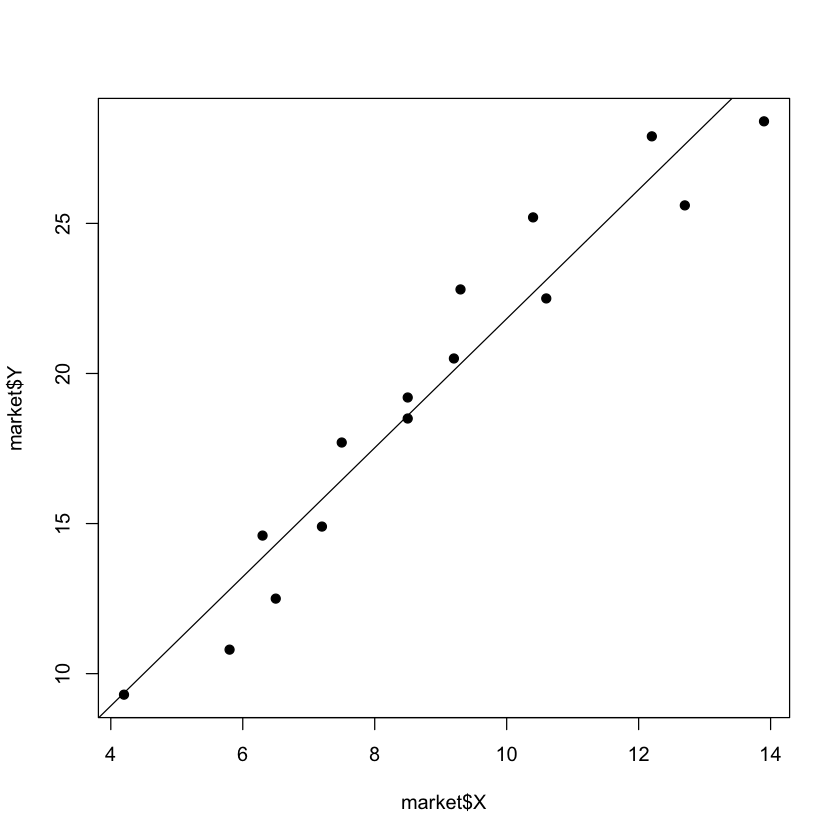

In [10]:
plot(market$X, market$Y, pch=19)
abline(market.lm)
identify(market$X,market$Y)

In [11]:
# 꼭 분산분석 해야한다고함(F분포)
anova(market.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,485.57264,485.572638,192.9033,3.553647e-09
Residuals,13,32.72336,2.517182,NA,NA


In [12]:
# 18p

In [13]:
# 유의수준 0.05의 F 기각역
qf(0.95, 1,13)

[1] 4.667193

In [14]:
# p값
1 - qf(0.95, 1,13)

[1] -3.667193

In [26]:
market.lm <- lm(Y ~ X, data=market)
data <- summary(market.lm)
data


Call:
lm(formula = Y ~ X, data = market)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.02908 -1.35349 -0.05685  0.98903  2.51517 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.3282     1.4302   0.229    0.822    
X             2.1497     0.1548  13.889 3.55e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.587 on 13 degrees of freedom
Multiple R-squared:  0.9369,	Adjusted R-squared:  0.932 
F-statistic: 192.9 on 1 and 13 DF,  p-value: 3.554e-09


In [30]:
#β1의 95% 신뢰구간
q.val <- qt(0.975, 13)
q.val

[1] 2.160369

In [28]:
attributes(market.lm)

$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

$class
[1] "lm"

In [33]:
b1 <- data$coefficients[2, 1]
b1
std1.err <- data$coefficients[2,2]
std1.err

[1] 2.149674

[1] 0.1547757

In [34]:
# b1(기울기)의 신뢰구간
b1.confidence.interval <- c(b1 - q.val * std1.err, b1 + q.val * std1.err)
b1.confidence.interval

[1] 1.815301 2.484046

In [35]:
b0 <- data$coefficients[1, 1]
b0
std0.err <- data$coefficients[1,2]
std0.err

[1] 0.3282205

[1] 1.430203

In [36]:
# b0(절편)의 신뢰구간
b0.confidence.interval <- c(b0 - q.val * std0.err, b0 + q.val * std0.err)
b0.confidence.interval

[1] -2.761546  3.417987

In [37]:
pred.frame <- data.frame(X=seq(3.5, 14.5, 0.2))

In [40]:
t(pred.frame)

X,3.5,3.7,3.9,4.1,4.3,4.5,4.7,4.9,5.1,5.3,⋯,12.7,12.9,13.1,13.3,13.5,13.7,13.9,14.1,14.3,14.5


In [47]:
pc <- predict(market.lm, int='c', newdata=pred.frame)
t(pc)

,1,2,3,4,5,6,7,8,9,10,⋯,47,48,49,50,51,52,53,54,55,56
fit,7.852079,8.282014,8.711949,9.141883,9.571818,10.001753,10.431688,10.861623,11.291557,11.72149,⋯,27.62908,28.05901,28.48895,28.91888,29.34882,29.77875,30.20869,30.63862,31.06856,31.49849
lwr,5.855247,6.344903,6.834076,7.322721,7.810782,8.298202,8.784913,9.270838,9.755893,10.23998,⋯,26.06781,26.44220,26.81577,27.18859,27.56073,27.93226,28.30323,28.67370,29.04370,29.41328
upr,9.848911,10.219125,10.589821,10.961046,11.332854,11.705304,12.078463,12.452407,12.827222,13.20301,⋯,29.19035,29.67582,30.16213,30.64918,31.13690,31.62524,32.11414,32.60355,33.09341,33.58370


In [43]:
pp <- predict(market.lm, int='p', newdata=pred.frame)
t(pp)

,1,2,3,4,5,6,7,8,9,10,⋯,47,48,49,50,51,52,53,54,55,56
fit,7.852079,8.282014,8.711949,9.141883,9.571818,10.001753,10.431688,10.861623,11.291557,11.721492,⋯,27.62908,28.05901,28.48895,28.91888,29.34882,29.77875,30.20869,30.63862,31.06856,31.49849
lwr,3.885278,4.344937,4.803678,5.261481,5.718324,6.174188,6.629052,7.082897,7.535704,7.987452,⋯,23.86268,24.26926,24.67480,25.07934,25.48289,25.88546,26.28709,26.68779,27.08758,27.48648
upr,11.818880,12.219090,12.620219,13.022286,13.425313,13.829318,14.234324,14.640348,15.047411,15.455532,⋯,31.39548,31.84877,32.30309,32.75843,33.21475,33.67204,34.13029,34.58946,35.04954,35.51051


In [45]:
pred.X <- pred.frame$X
pred.X

[1]  3.5  3.7  3.9  4.1  4.3  4.5  4.7  4.9  5.1  5.3  5.5  5.7  5.9  6.1  6.3
[16]  6.5  6.7  6.9  7.1  7.3  7.5  7.7  7.9  8.1  8.3  8.5  8.7  8.9  9.1  9.3
[31]  9.5  9.7  9.9 10.1 10.3 10.5 10.7 10.9 11.1 11.3 11.5 11.7 11.9 12.1 12.3
[46] 12.5 12.7 12.9 13.1 13.3 13.5 13.7 13.9 14.1 14.3 14.5

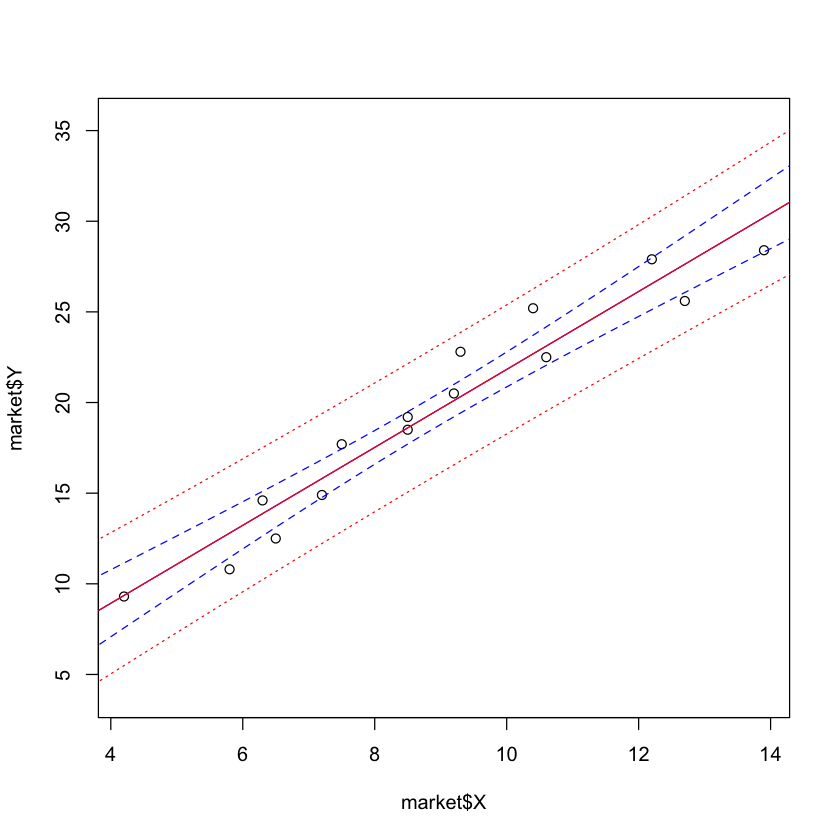

In [48]:
plot(market$X, market$Y, ylim=range(market$Y,pp))
matlines(pred.X, pc, lty=c(1,2,2), col='BLUE')
matlines(pred.X, pp, lty=c(1,3,3), col='RED')